<a href="https://colab.research.google.com/github/Shubhamkumar-op/Deep_Learning/blob/main/04_0_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-02-13 05:08:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.7MB/s    in 5.5s    

2023-02-13 05:08:36 (19.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import os

for dirpath, dirnames, dirfiles in os.walk("pizza_steal"):
  print(f"there are  {len(dirnames)} directories and {len(dirfiles)} image in {dirpath}.")

In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Feb 13 05:08 .
drwxr-xr-x 1 root root 4096 Feb 13 05:08 ..
drwxr-xr-x 4 root root 4096 Feb 13 05:08 test
drwxr-xr-x 4 root root 4096 Feb 13 05:08 train


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir+target_class

  random_image =random.sample(os.listdir(target_folder),1)
  print(random_image)

  img=mpimg.imread(target_folder+ "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape : {img.shape}")

  return img

['2687575.jpg']
Image shape : (384, 512, 3)


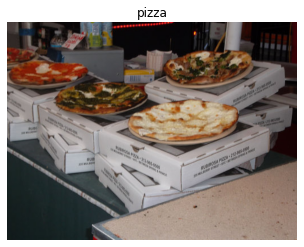

In [ ]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 67,  59,  56],
        [ 67,  59,  56],
        [ 68,  58,  56],
        ...,
        [ 53,   4,   7],
        [ 56,   4,   8],
        [ 59,   2,   8]],

       [[ 68,  60,  57],
        [ 68,  60,  57],
        [ 69,  59,  57],
        ...,
        [ 54,   4,   7],
        [ 55,   3,   7],
        [ 58,   1,   7]],

       [[ 69,  61,  58],
        [ 69,  61,  58],
        [ 70,  60,  58],
        ...,
        [ 54,   4,   7],
        [ 55,   3,   7],
        [ 57,   2,   7]],

       ...,

       [[ 18,  27,  26],
        [ 18,  27,  26],
        [ 18,  27,  26],
        ...,
        [163, 140, 126],
        [168, 145, 131],
        [168, 147, 130]],

       [[ 18,  27,  26],
        [ 18,  27,  26],
        [ 18,  27,  26],
        ...,
        [160, 131, 115],
        [165, 136, 118],
        [164, 137, 116]],

       [[ 18,  27,  26],
        [ 18,  27,  26],
        [ 18,  27,  26],
        ...,
        [155, 122, 10

In [ ]:
img.shape # returns width height and colour channels

(384, 512, 3)

In [ ]:
img/255

array([[[0.2627451 , 0.23137255, 0.21960784],
        [0.2627451 , 0.23137255, 0.21960784],
        [0.26666667, 0.22745098, 0.21960784],
        ...,
        [0.20784314, 0.01568627, 0.02745098],
        [0.21960784, 0.01568627, 0.03137255],
        [0.23137255, 0.00784314, 0.03137255]],

       [[0.26666667, 0.23529412, 0.22352941],
        [0.26666667, 0.23529412, 0.22352941],
        [0.27058824, 0.23137255, 0.22352941],
        ...,
        [0.21176471, 0.01568627, 0.02745098],
        [0.21568627, 0.01176471, 0.02745098],
        [0.22745098, 0.00392157, 0.02745098]],

       [[0.27058824, 0.23921569, 0.22745098],
        [0.27058824, 0.23921569, 0.22745098],
        [0.2745098 , 0.23529412, 0.22745098],
        ...,
        [0.21176471, 0.01568627, 0.02745098],
        [0.21568627, 0.01176471, 0.02745098],
        [0.22352941, 0.00784314, 0.02745098]],

       ...,

       [[0.07058824, 0.10588235, 0.10196078],
        [0.07058824, 0.10588235, 0.10196078],
        [0.07058824, 0

CNN model to find pattern in our image

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"
#import data from directories and turns it into batches

train_data = train_datagen.flow_from_directory(train_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            seed=42)
 
valid_data = valid_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["Accuracy"])

histroy_1=model_1.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 28s 317ms/step - loss: 0.6462 - Accuracy: 0.6087 - val_loss: 0.4851 - val_Accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4807 - Accuracy: 0.7787 - val_loss: 0.4640 - val_Accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4931 - Accuracy: 0.7800 - val_loss: 0.4068 - val_Accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4472 - Accuracy: 0.8007 - val_loss: 0.3832 - val_Accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4130 - Accuracy: 0.8227 - val_loss: 0.3712 - val_Accuracy: 0.8560


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Visulize the data

['381162.jpg']
Image shape : (306, 512, 3)
['1915343.jpg']
Image shape : (512, 512, 3)


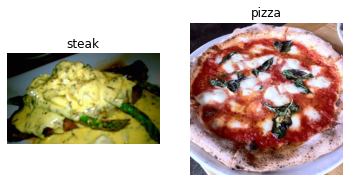

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

In [ ]:
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

 turn our data into batches

In [ ]:
!nvidia-smi

Mon Feb 13 05:09:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    36W /  70W |   2412MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)


In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
model_2 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
model_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 253ms/step - loss: 0.7106 - accuracy: 0.7167 - val_loss: 0.3800 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3936 - accuracy: 0.8247 - val_loss: 0.3971 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.2744 - accuracy: 0.8947 - val_loss: 0.4328 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.1929 - accuracy: 0.9333 - val_loss: 0.3498 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.1195 - accuracy: 0.9627 - val_loss: 0.3668 - val_accuracy: 0.8220


In [ ]:
import pandas as pd

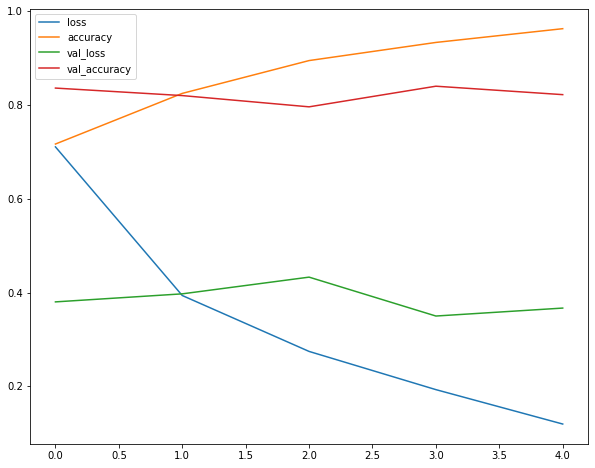

In [ ]:
pd.DataFrame(history_2.history).plot(figsize=(10,8))

In [ ]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

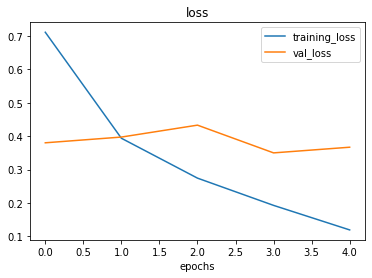

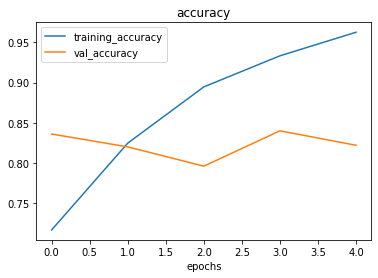

In [ ]:
plot_loss_curves(history_2)

In [ ]:
model_3 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 219ms/step - loss: 0.6301 - accuracy: 0.6313 - val_loss: 0.5182 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4850 - accuracy: 0.7833 - val_loss: 0.4515 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4346 - accuracy: 0.8133 - val_loss: 0.3497 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3865 - accuracy: 0.8313 - val_loss: 0.3237 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3557 - accuracy: 0.8500 - val_loss: 0.3172 - val_accuracy: 0.8700


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

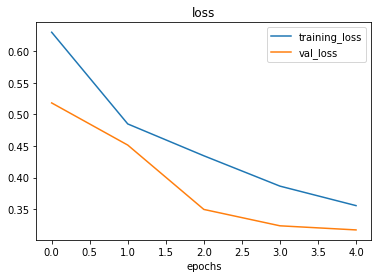

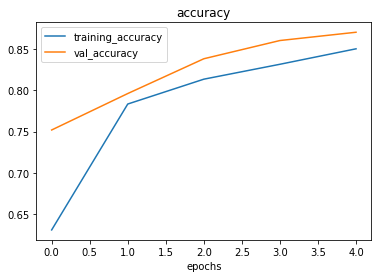

In [ ]:
plot_loss_curves(history_3)

In [ ]:
#With data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

#Without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255)

test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
print("augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)
print("non augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="binary",
                                            shuffle=False)


print("non augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode="binary",
                                          shuffle=False)

augmented training data
Found 1500 images belonging to 2 classes.
non augmented training data
Found 1500 images belonging to 2 classes.
non augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
images , labels = train_data.next()
augmented_images , augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

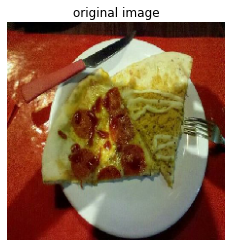

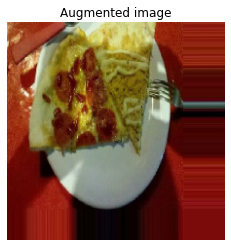

In [ ]:
 import random
 random_number = random.randint(0,32)
 plt.imshow(images[random_number])
 plt.title(f"original image")
 plt.axis(False)
 plt.figure() 
 plt.imshow(augmented_images[random_number])
 plt.title(f"Augmented image")
 plt.axis(False)

In [ ]:
model_4 = Sequential([
    Conv2D(10 ,3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10 ,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10 ,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 517ms/step - loss: 0.7013 - accuracy: 0.4393 - val_loss: 0.6917 - val_accuracy: 0.5740
Epoch 2/5
47/47 [==============================] - 24s 521ms/step - loss: 0.6950 - accuracy: 0.5180 - val_loss: 0.6856 - val_accuracy: 0.5140
Epoch 3/5
47/47 [==============================] - 25s 525ms/step - loss: 0.6922 - accuracy: 0.5267 - val_loss: 0.6524 - val_accuracy: 0.5140
Epoch 4/5
47/47 [==============================] - 37s 794ms/step - loss: 0.6909 - accuracy: 0.5493 - val_loss: 0.6693 - val_accuracy: 0.5960
Epoch 5/5
47/47 [==============================] - 25s 528ms/step - loss: 0.6975 - accuracy: 0.5393 - val_loss: 0.6792 - val_accuracy: 0.6660


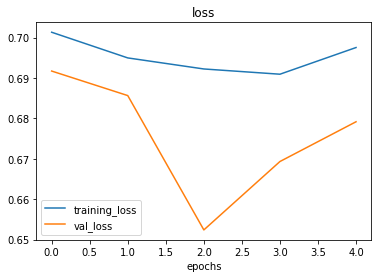

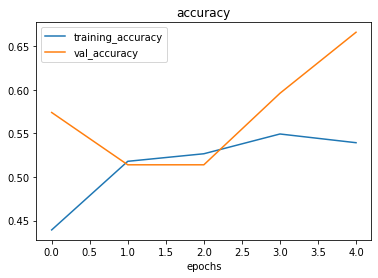

In [ ]:
plot_loss_curves(history_4)

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
# create a function to import an image and resize it 
def load_and_prep_image(filename,img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img=img/255
  return img